In [22]:
from not_bunny import *
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
data_all = pd.read_csv('stock_data.csv')
del data_all['Volume']
data_all = data_all.set_index(['Date', 'Ticker'])
data_all

Adj Close       Close        High         Low        Open
Date       Ticker                                                            
2014-02-03 AAPL     15.703114   17.911785   18.133215   17.832144   17.950357
           AMD       3.330000    3.330000    3.440000    3.330000    3.430000
           AMZN     17.307501   17.307501   18.042500   17.004999   17.948999
           CRM      58.470001   58.470001   61.200001   58.070000   61.099998
           GOOGL    28.364115   28.364115   29.572573   28.328579   29.509510
...                       ...         ...         ...         ...         ...
2024-02-01 INTC     43.360001   43.360001   43.570000   42.490002   43.150002
           META    394.779999  394.779999  400.500000  393.049988  393.940002
           MSFT    403.779999  403.779999  408.000000  401.799988  401.829987
           NVDA    630.270020  630.270020  631.909973  616.500000  621.000000
           TSLA    188.860001  188.860001  189.880005  184.279999  188.500000

[25170 rows x 5 columns]

In [3]:
data = data_all.xs('AAPL', level='Ticker')
data

,Adj Close,Close,High,Low,Open
Date,,,,,
2014-02-03,15.703114,17.911785,18.133215,17.832144,17.950357
2014-02-04,15.930429,18.171070,18.195000,17.955713,18.066071
2014-02-05,16.049398,18.306786,18.402857,18.080357,18.091429
2014-02-06,16.142948,18.303928,18.339287,18.136070,18.216429
2014-02-07,16.368795,18.559999,18.676071,18.477858,18.620714
...,...,...,...,...,...
2024-01-26,192.419998,192.419998,194.759995,191.940002,194.270004
2024-01-29,191.729996,191.729996,192.199997,189.580002,192.009995
2024-01-30,188.039993,188.039993,191.800003,187.470001,190.940002


In [4]:
# Extracting the Adj Close column
data_target = data[['Adj Close']]

# Scaling the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_target)
data_scaled

array([[0.        ],
       [0.0012462 ],
       [0.00189842],
       ...,
       [0.94479371],
       [0.92483833],
       [0.9383247 ]])

In [5]:
# Testing all the models

# 1. ANN
mae_ann, mse_ann, pred_ann, actual_ann = ann(data_scaled)
# 2. LSTM_1
mae_lstm1d, mse_lstm1d, pred_lstm1d, actual_lstm1d = lstm_1d(data_scaled)
# 3. LSTM_2
mae_lstm2d, mse_lstm2d, pred_lstm2d, actual_lstm2d = lstm_2d(data_scaled)
# 4. LSTM_3
mae_lstm3d, mse_lstm3d, pred_lstm3d, actual_lstm3d = lstm_3d(data_scaled)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100

52/52 [==============================] - 2s 9ms/step - loss: 0.1632 - val_loss: 0.6490
Epoch 2/100
52/52 [==============================]

In [21]:
pred_ann = pred_ann.reshape(-1)
actual_ann = actual_ann.reshape(-1)

In [23]:
# Calculating the r2 score of ann
r2_ann = 1 - np.sum((actual_ann - pred_ann)**2) / np.sum((actual_ann - np.mean(actual_ann))**2)
r2_ann

0.6211821082278078

In [26]:
pred_lstm1d = pred_lstm1d.reshape(-1)

In [27]:
# Calcultaing the r2 score of lstm_1d
r2_lstm1d = 1 - np.sum((actual_lstm1d - pred_lstm1d)**2) / np.sum((actual_lstm1d - np.mean(actual_lstm1d))**2)
r2_lstm1d

0.4708222408233692

In [28]:
# Calculating the r2 score of lstm_2d
pred_lstm2d = pred_lstm2d.reshape(-1)
r2_lstm2d = 1 - np.sum((actual_lstm2d - pred_lstm2d)**2) / np.sum((actual_lstm2d - np.mean(actual_lstm2d))**2)
r2_lstm2d

0.24174241736012914

In [29]:
# Calculating the r2 score of lstm_3d
pred_lstm3d = pred_lstm3d.reshape(-1)
r2_lstm3d = 1 - np.sum((actual_lstm3d - pred_lstm3d)**2) / np.sum((actual_lstm3d - np.mean(actual_lstm3d))**2)
r2_lstm3d

-2.2890850262624265

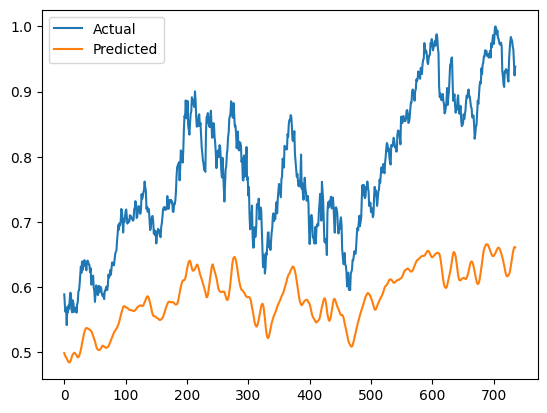

In [30]:
# PLotting the actual and predicted lstm3d values om the same plot
import matplotlib.pyplot as plt
plt.plot(actual_lstm3d, label='Actual')
plt.plot(pred_lstm3d, label='Predicted')
plt.legend()
plt.show()

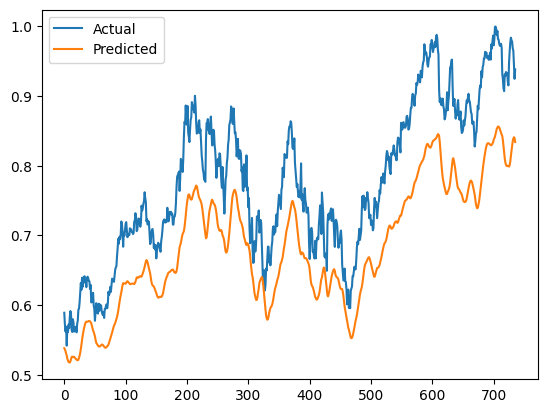

In [31]:
# Plotting the actual and predicted lstm2d values on the same plot
plt.plot(actual_lstm2d, label='Actual')
plt.plot(pred_lstm2d, label='Predicted')
plt.legend()
plt.show()

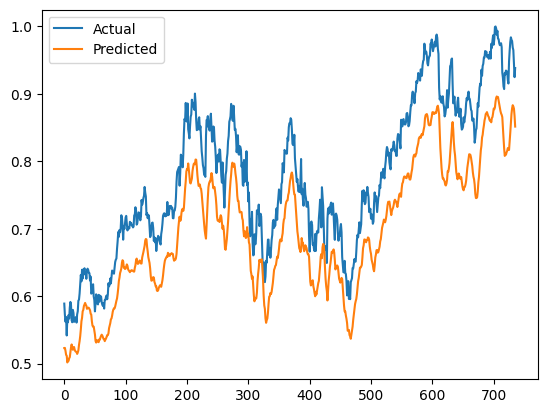

In [32]:
# Plotting the actual and predicted lstm1d values on the same plot
plt.plot(actual_lstm1d, label='Actual')
plt.plot(pred_lstm1d, label='Predicted')
plt.legend()
plt.show()

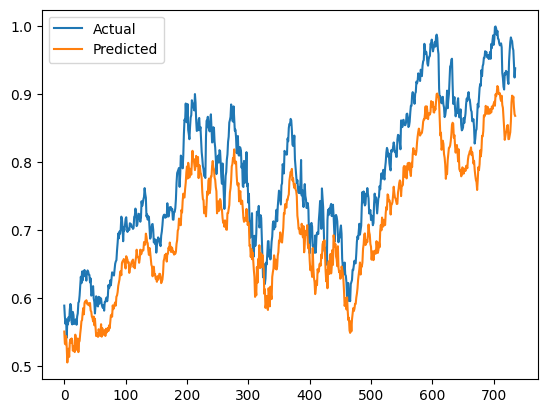

In [33]:
# Plotting the actual and predicted ann values on the same plot
plt.plot(actual_ann, label='Actual')
plt.plot(pred_ann, label='Predicted')
plt.legend()
plt.show()